# Seasonality of Winter Precipitation and Groundwater Recharge in the Elwha – Dungeness Watershed, Washington State, United States  

**Report by Megan Verfaillie**

**ESCI 895: Final Project**

**Fall 2021**

## Site Description 

The Elwha - Dungeness watershed (Water Resource Inventory Area (WRIA) 18) is located in Clallam County and Jefferson County in Washington State. Clallam County contains the cities of Sequim and Port Angeles which make up the largest urban areas in the watershed. The area of the subbasin is 807,954 acres and elevations range from 0 to 7788 feet above sea level. The watershed is 25% privately owned and 75% publicly owned and overlaps with Olympic National Park [1]. Olympic National Park was established in 1938 to protect one of the largest areas of old growth forests and temperate rain forests in the lower 48 states [2]. 

The climate in Clallam County, located north of Olympic National Park, is moderate and temperate, with relatively low rainfall in coastal region, an average maximum temperature of 57.7° F and a lowest average temperature of 41.2° F. Greater precipitation occurs in the mountainous regions of Jefferson County [3, 4]. Winter snowfall ranges from 10-30 inches at lower elevations and between 250-500 inches in the mountains [4]. In December 2008 and January 2009, Clallam County experienced flooding and mudslides caused by severe winter storms, record snowfall, additional rainfall, and thawing. N 2015, Clallam County experienced an extreme drought where 100% of the County’s area was in D3 or D4 droughts. Predicted decreases in annual snowpack and increasing instances of prolonged heat will increase the likelihood of future droughts [5]. 

![Figure1](Figure1.png)


<div class="alert alert-block alert-info"> <b>Figure 1: Elwha-Dungeness Watershed (HUC 17110020) annual precipitation map of PRISM raster data from 1961-1990 (left) and statewide, 30-meter resolution USGS ditital model (DEM) raster of elevation (right). Reprinted from U.S. Department of Agriculture Natural Resources Conservation Service "Dungeness-Elwha Watershed Rapid Watershed Assessment" [1].</b> </div> 

## Research Question 

How does rainfall and snowmelt in the mountanous region of the Elwha - Dungeness watershed in Washington, U.S. influence downslope groundwater recharge in Sequim, WA? 

Climate change is predicted to alter winter precipitation, causing an increase in rainfall and a decrease in snowfall in some areas. Snow stored at high elevations is a valuable water resource during spring melt periods as it runs off into surface water rivers and groundwater. Understanding how the precipitation and snowpack melt in the mountains influence downslope groundwater recharge is critical for resource planning and predictions of snowmelt flooding. 

This analysis combined a qualitative and quantitative comparison to describe trends in groundwater levels over one water year for the following scenarios: 

- Year with high SWE
- Year with low SWE 
- Year with high groundwater (shallow depth from surface) 
- Year with low groundwater (greater depth from surface) 
- Year with more snowfall than rainfall (snowfall dominated) 
- Year with more rainfall than snowfall (rainfall dominated) 
- All years in study period

For each plot in the analysis, the rainfall precipitation centroid and day with 50% remaining SWE were identified. These values were used to calculate the lag to peak groundwater level (shallowest depth from surface) for each analysis year. Lag to peak ground water was used as an indicator of the influence of rainfall and snowmelt in the mountains on downslope groundwater levels. 


The following plots were produced: 

- Plots for data visualization, gap filling, and identification of seasonal trends
   - Lat/Lon map of elevation at monitoring stations  
   - Groundwater well depth below land surface over entire study period (2008 -2021) 
   - Timeseries of SWE for entire sample period (2008 – present) for each location and their average for entire study period 
   - Timeseries of maximum, minimum, and average temperature at each location for entire study period 
   - Timeseries of rainfall, snowfall, and cumulative precipitation data at each location for entire study period 
   - Timeseries of groundwater levels, SWE, snowfall, and rainfall for entire period of record 
- Plots for selection of analysis years 
   - Timeseries of daily snow water equivalent (SWE) at each location (i.e., multiple lines for each year) 
   - Timeseries of daily groundwater depth from surface at downslope monitoring well (i.e., multiple lines for each year) 
- Timeseries Analysis of groundwater levels, SWE, snowfall, and rainfall produced for each site over: 
    - Entire period of record 
    - Max / min SWE years 
    - Max / min groundwater level years 
    - Snowfall / rainfall dominated years 
- Timeseries of day of peak groundwater, rainfall precipitation centroid, and day of 50% SWE for each water year 
    


## Data Sets 

The Snow Telemetry (SNOTEL) Network is part of the United States Department of Agriculture (USDA) Natural Resources Conservation Service (NRCS) Snow Survey and Water Supply Forecasting (SSWSF) Program for automated snow monitoring. The SNOTEL network is composed of over 900 automated data collection sites located in high-elevation mountain watershed in the western United States. They measure snowpack, precipitation, temperature, and other climatic conditions. A typical site is designed to operate unattended and without maintenance for a year or more and consists of measuring devices and sensors, an equipment shelter for radio telemetry equipment, solar panels, batteries, and a radio antenna. A snow pillow is used to weigh the snow with a pressure transducer to estimate the snow water equivalent, or the amount of water in a given volume of snow [6]. 

There are four SNOTEL sites on the Olympic Peninsula which were installed in 1990, 1999, 2000, and 2008 [7]. Two of these gauges (Waterhole and Dungeness) are located at different elevations (~1000 feet) in the same watershed. These SNOTEL sites include records for snow depth, snow water equivalent (SWE), maximum and minimum air temperature, and precipitation accumulation at hourly intervals in CSV format, with the most recent record starting in 2000. 

The United States Geological Survey (USGS) operates a National Groundwater Monitoring Network (NGWMN) which is a collaboration between state, federal, and local agency data providers to maintain a national network of groundwater wells [8]. USGS currently maintains a single groundwater monitoring well in Sequim, WA (USGS 480546123100901), located downslope of the selected SNOTEL sites. Well monitoring data includes depth to water table as feet below the surface and is available at daily and 15-minute intervals in CSV format from 2018 to present. Prior to 2018, the Washington State Department of Ecology (WAECY) maintained a groundwater monitoring well in the same location which includes daily data in CSV format from 2008 to 2018. 

|Data|Provider|Site Name|Type|Period of Record|Highest Frequency|Format|
| --- | --- | --- | --- | --- | --- | --- |
|SNOTEL|USDA|[Waterhole](https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=974)|Snow depth, SWE, max/min/ temperature, precipitaiton accumulation|1999 - present|Hourly|CSV|
|SNOTEL|USDA|[Dungeness](https://wcc.sc.egov.usda.gov/nwcc/site?sitenum=943)|Snow depth, SWE, max/min/ temperature, precipitaiton accumulation|1998 - present|Hourly|CSV|
|Groundwater Well|USGS|[480546123100901](https://waterdata.usgs.gov/wa/nwis/uv/?site_no=480546123100901&PARAmeter_cd=72019)|Depth to water table (ft)|2018 - present|15 - minute|CSV|
|Groundwater Well|WAECY|[APS724](https://cida.usgs.gov/ngwmn/provider/WAECY/site/100054068/)|Depth to water table (ft)|2008 - 2018|Daily|CSV|


## Site Map 
|Site|Latitude|Longitude|
| --- | --- | --- | 
|SNOTEL Waterhole|47 deg; 57 min N|123 deg; 26 min W|
|SNOTEL Dungeness|47 deg; 52 min N|123 deg; 5 min W|
|USGS 480546123100901|48° 05' 46.0" N|123° 10' 08.8" W|
|WAECY APS724|48° 5' 45.9594" N|123° 10' 8.76" W|

![Figure_2](Figure_2.png)


<div class="alert alert-block alert-info"> <b>Figure 2: Location map of study area. SNOTEL stations are labeled in white and USGS/WACEY groundwater well in pink. Major river flowlines are drawn in blue. Red outline delineates Dungeness - Elwha Watershed. Data sourced from Washington Geospatial Open Data Portal. </b> </div> 

## Methods 


### Load Libraries and Set Constants 

In [1]:
# External libraries
import numpy as np                         # functions for data analysis 
import pandas as pd                        # functions for data frames
from matplotlib import pyplot as plt       # functions for plotting
from datetime import datetime              # functions for datetime formatting 
from IPython.display import display, HTML  # 

# Reference Files 
fileName0 = 'LatLonElev.csv'                          # Includes, lat, lon, and elevation for each site 
fileName1 = 'Waterhole_Daily_Sensor_Data_Full.txt'    # Daily SNOTEL data for the Waterhole monitoring staiton 
fileName2 = 'Dungeness_Daily_Sensor_Data_Full.txt'    # Daily SNOTEL data for the Dungeness monitoring station 
fileName3 = 'WACEY_Water_Level_2007_to_2018.csv'      # Daily water level data for WACEY groundwater well in Sequim, WA 
fileName4 = 'USGS_Well_Depth_2018_to_2021.txt'        # 15 minute water level data for USGS groundwater well in Sequim, WA 

# Analysis Period (selected based on matching period of data between SNOTEL and groundwater wells) 
startdate = datetime(2008,10,1)
enddate = datetime(2021,9,30)


### Plot Sites by Latitude and Longitude

The sites were plotted by latitude and longitude and assigned color and size based on elevation. The intent of this analysis was to understand the influence of rainfall and snowmelt conditions at higher elevations, so it was important to establish the elevation difference between the monitoring sites. 

In [2]:
# Load lat/lon Data and Convert from ft to meters 
dfsites = pd.read_csv(fileName0, delimiter=",", comment = "#", header=0)
dfsites['Elevation (m)'] = dfsites['Elevation (ft)']*0.3048

print('Success')

Success


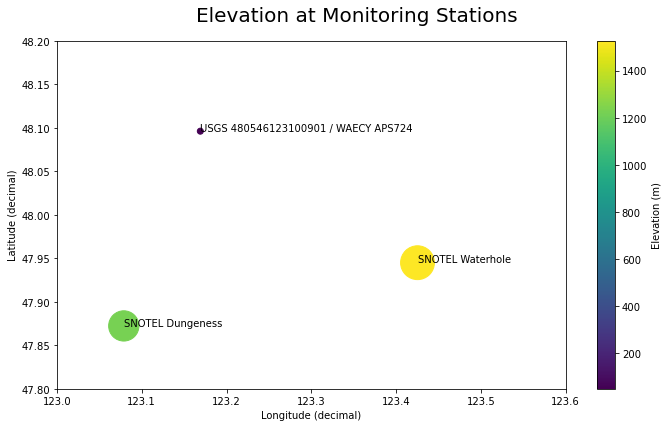

In [3]:
# Plot Data 
fig, ax = plt.subplots(figsize = (10,6))
fig.suptitle('Elevation at Monitoring Stations', fontsize = 20)
sitescatter = ax.scatter(dfsites['Lon'], dfsites['Lat'], c = dfsites['Elevation (m)'], 
                         s = dfsites['Elevation (m)']*0.75, cmap = 'viridis', label = 'Sites')
ax.set_xlim(123, 123.6)
ax.set_xlabel('Longitude (decimal)')
ax.set_ylim(47.8, 48.2)
ax.set_ylabel('Latitude (decimal)')
fig.tight_layout(pad = 1)
# Add colorbar
fig.colorbar(sitescatter, label = 'Elevation (m)')
# Annotate with site names
for i, label in enumerate(dfsites['Site']):
    plt.annotate(label, (dfsites['Lon'][i], dfsites['Lat'][i]))

<div class="alert alert-block alert-info"> <b>Figure 3: Four monitoring stations plotted based on latitude and longitude. Color and size of points is based on elevation. The USGS/WACEY groundwater well is at the lowest elevation (<200 m) while the SNOTEL Waterhole site is at the greatest (>1400 m).</b> </div> 

### Data Download, Organization, and Gap Filling

Groundwater well data was collected from WAECY and USGS for two consecutive periods of record (2008 – 2018 and 2018 – present). Periods of missing data were filled via interpolation of surrounding data. USGS data is available at 15-minute intervals and was resampled to hourly average values to match WACEY and SNOTEL data frequencies.

In [4]:
# Load data from Washington State Department of Ecology 
dfwacey = pd.read_csv(fileName3, delimiter=",", comment='#', header=0) 
dfwacey['Time'] = pd.to_datetime(dfwacey['Time'], format = '%Y-%m-%dT%H:%M:00-%S:00')
dfwacey = dfwacey.set_index(['Time'])
datetime_object = datetime.strptime('2007-07-25 12:27:00-08:00', '%Y-%m-%d %H:%M:00-%S:00')
dfwacey = dfwacey[['Depth to Water Below Land Surface in ft.']]
dfwacey = dfwacey.rename(columns={'Depth to Water Below Land Surface in ft.':'Depth to Water Level (ft)'})
dfwacey['Depth to Water Level (m)'] = dfwacey['Depth to Water Level (ft)']*0.3048
dfwacey.index = pd.to_datetime(dfwacey.index).date 
dfwacey.index = pd.to_datetime(dfwacey.index, format = '%Y-%m-%d')
dfwacey = dfwacey.resample('D').mean() 
dfwacey = dfwacey.loc[~dfwacey.index.duplicated(),:]
dfwacey = dfwacey.interpolate(method = 'linear')

# Load data from USGS 
dfusgs = pd.read_csv(fileName4, delimiter="\t", comment='#', header=1, parse_dates=['20d'])
dfusgs = dfusgs.rename(columns={"20d": "Date", '14n': 'Depth to Water Level (ft)'})
dfusgs = dfusgs.set_index(['Date'])
dfusgs = dfusgs.resample('D').mean() 
dfusgs = dfusgs[['Depth to Water Level (ft)']]
dfusgs['Depth to Water Level (m)'] = dfusgs['Depth to Water Level (ft)']*0.3048
dfusgs = dfusgs.interpolate(method = 'linear')

print('Success')

Success


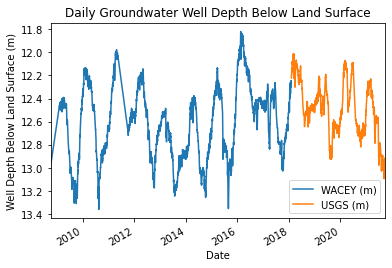

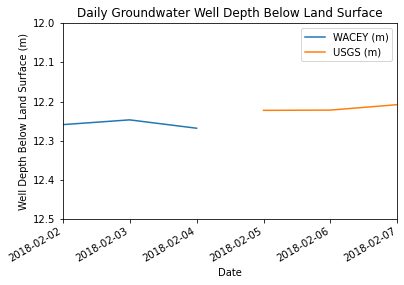

In [5]:
# Visualize datasets 
fig, ax = plt.subplots()
ax.set_title('Daily Groundwater Well Depth Below Land Surface')
ax.set_xlabel('Date')
ax.set_ylabel('Well Depth Below Land Surface (m)')
ax.invert_yaxis()
ax.plot(dfwacey.index, dfwacey['Depth to Water Level (m)'], label = 'WACEY (m)')
ax.plot(dfusgs.index, dfusgs['Depth to Water Level (m)'], label = 'USGS (m)')
ax.legend()
ax.set_xlim(startdate, enddate)
fig.autofmt_xdate()
plt.show()

# Visualize data gap between WACEY and USGS 
def gwgap(df1, df2, df3 = None):
    fig, ax = plt.subplots()
    ax.set_title('Daily Groundwater Well Depth Below Land Surface')
    ax.set_xlabel('Date')
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax.set_ylim(12, 12.5)
    ax.invert_yaxis()
    if df3 is not None: 
        ax.plot(df3.index, df3['Depth to Water Level (m)'], linestyle = '--', label = 'Combined')
    ax.plot(df1.index, df1['Depth to Water Level (m)'], label = 'WACEY (m)')
    ax.plot(df2.index, df2['Depth to Water Level (m)'], label = 'USGS (m)')
    ax.legend()
    ax.set_xlim(datetime(2018,2,2), datetime(2018,2,7))
    fig.autofmt_xdate()
    plt.show()

gwgap(dfwacey, dfusgs)

<div class="alert alert-block alert-info"> <b>Figure 4: Groundwater well depth below surface for WACEY and USGS monitoring stations. Daily data has no gaps and values are within ~ 0.05 m of eachother at the end of the WACEY data and start of USGS data. </b> </div> 

The USGS and WACEY sites were located in the same location, therefore the USGS data for date and depth to water table was appended to the WACEY data to create an extended period of record (2008 – present). No overlapping dates were present in original datasets. 

Success


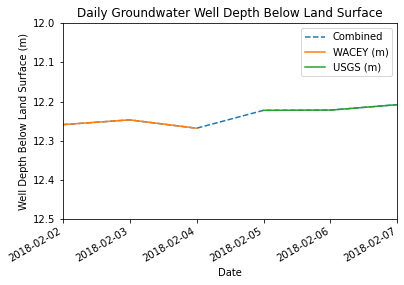

In [6]:
# Join WACEY and USGS data and remove overlaps
dfwell = pd.concat([dfwacey, dfusgs], join = 'outer') 
dfwell.index = pd.to_datetime(dfwell.index).date 
dfwell.index = pd.to_datetime(dfwell.index, format = '%Y-%m-%d')

print('Success')

# Visualize filled data gap 
def gwgap(df1, df2, df3 = None):
    fig, ax = plt.subplots()
    ax.set_title('Daily Groundwater Well Depth Below Land Surface')
    ax.set_xlabel('Date')
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax.set_ylim(12, 12.5)
    ax.invert_yaxis()
    if df3 is not None: 
        ax.plot(df3.index, df3['Depth to Water Level (m)'], linestyle = '--', label = 'Combined')
    ax.plot(df1.index, df1['Depth to Water Level (m)'], label = 'WACEY (m)')
    ax.plot(df2.index, df2['Depth to Water Level (m)'], label = 'USGS (m)')
    ax.legend()
    ax.set_xlim(datetime(2018,2,2), datetime(2018,2,7))
    fig.autofmt_xdate()
    plt.show()
    
    '''Function inputs include: 
    df1 = first source of well data (WACEY)
    df2 = second source of well data (USGS)
    df3 = combined dataset
    
    Returns plot of combined/filled well data compared to original for period of data gap'''

gwgap(dfwacey, dfusgs, dfwell)

<div class="alert alert-block alert-info"> <b>Figure 5: Groundwater well depth below surface for WACEY (orange) and USGS (green) monitoring stations. Blue line shows combined dataset over period of gap.</b> </div>

SNOTEL data for snow depth, SWE, temperature, and precipitation accumulation was collected from USDA for the Waterhole and Dungeness sites in CSV format. Dates prior to 2008 were removed from the dataset to match the period of record for the groundwater samples. No gap filling was completed for this data due to later resampling. 

In [7]:
# Function for loading SNOTEL data, filling gaps by linear interpolation, and converting to metric 
def loadSNOTEL(fileName): 

    df = pd.read_csv(fileName, delimiter=",", comment='#', header=0, parse_dates=['Date'])
    df = df.set_index(['Date'])
    df = df[['Snow Water Equivalent (in) Start of Day Values', 'Air Temperature Minimum (degF)', 
                              'Air Temperature Maximum (degF)', 'Air Temperature Average (degF)', 
                              'Precipitation Increment (in)', 'Precipitation Accumulation (in) Start of Day Values']]
    
    # Convert SWE to meters 
    df['Snow Water Equivalent (m)'] = df['Snow Water Equivalent (in) Start of Day Values']*0.0254
    
    # Convert temperatures to degrees C 
    df['Air Temperature Minimum (degC)'] = (df['Air Temperature Minimum (degF)'] - 32) / 1.8
    df['Air Temperature Maximum (degC)'] = (df['Air Temperature Maximum (degF)'] - 32) / 1.8
    df['Air Temperature Average (degC)'] = (df['Air Temperature Average (degF)'] - 32) / 1.8
    
    # For plotting zero degrees C 
    df['Zero'] = 0
    
    # Convert precipitation to cm 
    df['Precipitation Increment (cm)'] = df['Precipitation Increment (in)']*2.54
    df['Precipitation Accumulation (cm)'] = df['Precipitation Accumulation (in) Start of Day Values']*2.54
    
    '''Function input includes: 
    fileName = File name and location of SNOTEL data 
    
    Returns dataframe of requested SNOTEL data'''
    
    return df

# Run Function for Waterhole and Dungeness 
dfwaterhole = loadSNOTEL(fileName1)
dfdungeness = loadSNOTEL(fileName2)

print('Success')

Success


A mask was applied to separate the precipitation increment into snowfall (as water equivalent) and rainfall. Precipitation that corresponded with temperatures less than 0 °C was identified and extracted to create a list of hourly snowfall. Precipitation that corresponded with temperatures greater than 0 °C was used to create a list of hourly rainfall. 

In [8]:
# Function to separate SNOTEL precipitation increment into snowfall and rainfall based on average temperature 
# Snow occurs at temps <= 0 degrees C, rain occurs at temps > 0 degrees C 
def snowrain(df): 
    df['Snowfall'] = df['Precipitation Increment (cm)'][df['Air Temperature Average (degC)'] <= 0]
    df['Snowfall'].fillna(0, inplace = True)
    
    df['Rainfall'] = df['Precipitation Increment (cm)'][df['Air Temperature Average (degC)'] > 0]
    df['Rainfall'].fillna(0, inplace = True)
    
    '''Function inputs include: 
    df = SNOTEL dataframe produced from "loadSNOTEL" function 
    
    Returns SNOTEL dataframe with two new columns ("Snowfall" and "Rainfall") created by splitting the precipitation column 
    based on average temperature to identify periods of snowfall (in water equivalent) and periods of rainfall'''
    
    return df

# Run function for Waterhole and Dungeness 
dfwaterhole = snowrain(dfwaterhole)
dfdungeness = snowrain(dfdungeness)

print('Success')


Success


### Data Summary for Full Period of Study (2008 - Present)

A timeseries was created to show the full record from each site and their average, combined SWE on each date to demonstrate patterns of SWE for the entire sample region. 

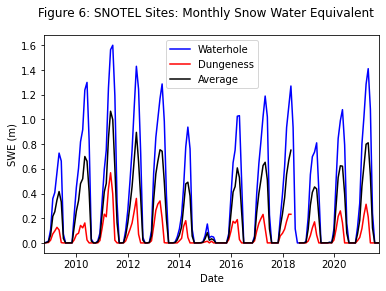

In [9]:
fig, ax = plt.subplots()
fig.suptitle('Figure 6: SNOTEL Sites: Monthly Snow Water Equivalent')

ax.plot(dfwaterhole['Snow Water Equivalent (m)'].resample('M').mean(), color = 'blue', label = 'Waterhole')
ax.plot(dfdungeness['Snow Water Equivalent (m)'].resample('M').mean(), color = 'red', label = 'Dungeness')
ax.plot((dfwaterhole['Snow Water Equivalent (m)'].resample('M').mean() + 
         dfdungeness['Snow Water Equivalent (m)'].resample('M').mean())/2, 
        color = 'k', label = 'Average')

ax.set_xlim(startdate, enddate)
ax.set_xlabel('Date')
ax.set_ylabel('SWE (m)')
ax.legend()
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 6: Snow water equivalent over entire period of interest (2008-2021) for the two study sites. Waterhole is shown in blue and Dungeness in red. Their average SWE is shown in black. Waterhole consistently had greater SWE than Dungeness. Both sites followed similar trends, especially in 2015 when there was very little SWE at both sites, and in 2011 when both sites reached their max SWE for the study period. A gap is present in the Dungeness data for the 2018 water year so this year was excluded from the annual analysis.</b> </div> 

A timeseries of maximum, minimum, and average temperatures were also created for each SNOTEL site showing the trend over time. A similar plot was created as part of the analysis in Stamper, 2018. In this analysis, temperature was used to identify precipitation type and, therefore, an overall increase or decrease in average temperature will significantly influence the results. 

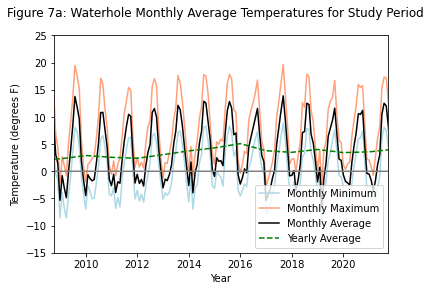

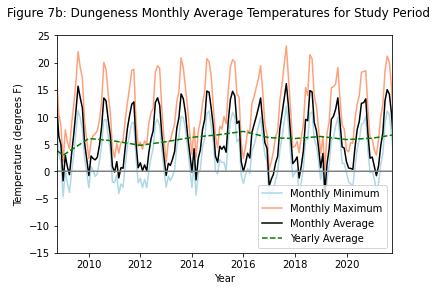

In [10]:
# Function for plotting min, max, and average monthly temperature for each site 
def plottemp(df, site, start_date, end_date):
    fig, ax = plt.subplots() #figsize = (9,6)
    ax.plot(df['Air Temperature Minimum (degC)'].resample('M').mean(), color = 'lightblue', label = 'Monthly Minimum')
    ax.plot(df['Air Temperature Maximum (degC)'].resample('M').mean(), color = 'lightsalmon', label = 'Monthly Maximum')
    ax.plot(df['Air Temperature Average (degC)'].resample('M').mean(), color = 'k', label = 'Monthly Average')
    ax.plot(df[['Air Temperature Average (degC)']].resample('Y').mean(), color = 'green', linestyle = '--', 
            label = 'Yearly Average')
    ax.plot(df['Zero'], color = 'gray')
    
    ax.set_xlim(start_date, end_date)
    ax.set_ylim(-15, 25)
    fig.suptitle(site + ' Monthly Average Temperatures for Study Period')
    ax.set_xlabel('Year')
    ax.set_ylabel('Temperature (degrees F)')
    ax.legend(loc = 'lower right')
    
    '''Function inputs include: 
    df = Dataframe including min, max, and average temperature data and datetime index 
    site = Title of site as text string (in quotes) 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    
    Returns plot of monthly min, max, and average temperature, yearly average temperature, and zero degree line. 
    '''
    
# Run function for Waterhole and Dungeness 
plottemp(dfwaterhole, 'Figure 7a: Waterhole', startdate, enddate)
plottemp(dfdungeness, 'Figure 7b: Dungeness', startdate, enddate)


<div class="alert alert-block alert-info"> <b>Figure 7a and 7b: Monthly minimum, maximum, and average temperatures for Waterhole (8a) and Dungeness (8b). The yearly average is shown as a green dotted line and zero degrees is shown by a solid gray line. Both sites show smilar magnitudes of seasonal temperature, with Dungeness having a slightly higher overall temperature for most years. Both sites also show a slight increase in yearly average temperature over the period of record.</b> </div> 

A timeseries plot of rainfall, snowfall, temperature, and cumulative precipitation was created for each SNOTEL site to demonstrate water input into the mountainous region near Sequim, WA. A line was drawn at 0 °C to illustrate the freezing point of water. A similar plot was created as part of the analysis in Stamper, 2018. 

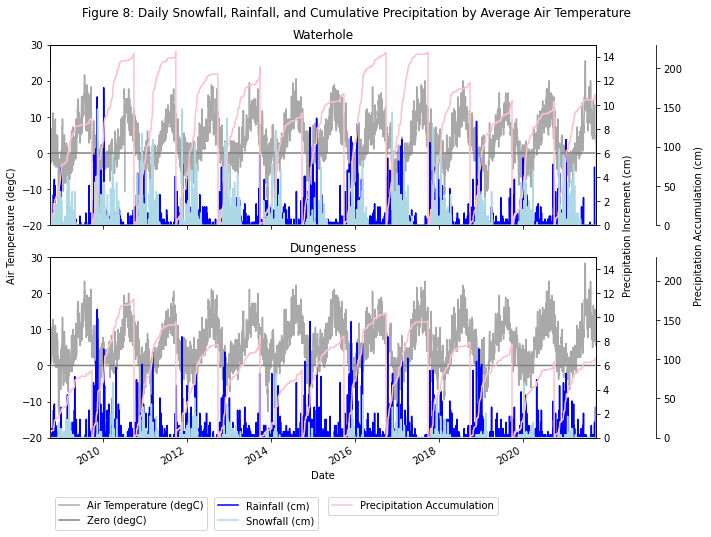

In [11]:
# Function for plotting daily precipitation data vs daily average temperature 

def plotprecip(df1, df2, start_date, end_date, figure_num): 
    
    fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize = (10,7.5))
    
    fig.suptitle(figure_num + ': Daily Snowfall, Rainfall, and Cumulative Precipitation by Average Air Temperature')
    ax2.set_xlabel('Date')
    ax.set_xlim(start_date, end_date)
    ax2.set_xlim(start_date, end_date)
    ax.set_title('Waterhole')
    ax2.set_title('Dungeness')
    
    ax.plot(df1.index, df1['Air Temperature Average (degC)'], color = 'darkgray', label = 'Air Temperature (degC)')
    ax.plot(df1.index, df1['Zero'], color = 'gray', label = 'Zero (degC)')
    
    ax1 = ax.twinx()
    ax1.plot(df1['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax1.plot(df1['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax2.plot(df2.index, df2['Air Temperature Average (degC)'], color = 'darkgray', label = 'Air Temperature (degC)')
    ax2.plot(df2.index, df2['Zero'], color = 'gray', label = 'Zero (degC)')


    ax3 = ax2.twinx()
    ax3.plot(df2['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax3.plot(df2['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax4 = ax.twinx()
    ax4.plot(df1['Precipitation Accumulation (cm)'], color = 'pink', label = 'Precipitation Accumulation')    
    ax4.spines['right'].set_position(('outward', 60))
            
    ax5 = ax2.twinx()
    ax5.plot(df2['Precipitation Accumulation (cm)'], color = 'pink', label = 'Precipitation Accumulation')
    ax5.spines['right'].set_position(('outward', 60))
    
    ax.set_ylabel('Air Temperature (degC)')
    ax1.set_ylabel('Precipitation Increment (cm)')
    ax4.set_ylabel('Precipitation Accumulation (cm)')
    
    ax.set_ylim(bottom = -20, top = 30)
    ax2.set_ylim(bottom = -20, top = 30)
    
    ax1.set_ylim(bottom = 0, top = 15)
    ax3.set_ylim(bottom = 0, top = 15)

    ax4.set_ylim(bottom = 0, top = 230)
    ax5.set_ylim(bottom = 0, top = 230)

    ax.yaxis.set_label_coords(-0.06,0)
    ax1.yaxis.set_label_coords(1.05,0)
    ax4.yaxis.set_label_coords(1.18,0)
    
    ax2.legend(loc = 'upper left', bbox_to_anchor = (0,-0.3))
    ax3.legend(loc = 'upper right', bbox_to_anchor = (0.5,-0.3))    
    ax5.legend(loc = 'upper left', bbox_to_anchor = (0.5, -0.3))
    
    fig.autofmt_xdate()
    fig.tight_layout(pad = 1)
    
    '''Function inputs include: 
    df1 = Dataframe including average temperature, snowfall, rainfall, cumulative precipitation and datetime index 
    df2 = Dataframe including average temperature, snowfall, rainfall, cumulative precipitation and datetime index 
    dfgw = Dataframe including groundwater levels and datetime index 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    figure_num = Figure number assigned to output plot as string 
    
    Returns plot of snowfall, rainfall, SWE, and groundwater levels for each day of water year. 
    '''

# Run function for Waterhole and Dungeness 
plotprecip(dfwaterhole, dfdungeness, startdate, enddate, 'Figure 8')


<div class="alert alert-block alert-info"> <b>Figure 8a and 8b: Average daily air temp (dark gray), daily rainfall (blue), snowfall (light blue), and cumulative precipitation (pink) for for Waterhole (9a) and Dungeness (9b). Zero degrees is shown by a solid gray line. Cumulative precipitation for each year is greater at Waterhole than Dungeness. Waterhole also experiences more snowfall than Dungeness for the period of interest. </b> </div> 

Groundwater levels extracted from the combined dataset were plotted for the period of record along with snowfall, rainfall, and SWE. plotwater creates a plot for both sites at once for the same time period while plotwater1 creates a plot for a single site over a specified time period. 

In [12]:
# Function to plot snowfall, rainfall, and groundwater well level 
def plotwater(df1, df2, dfgw, start_date, end_date, figure_num): 
    
    fig, (ax, ax2) = plt.subplots(2,1, sharex = True, figsize = (10,7.5))
    
    fig.suptitle(figure_num + ': Daily Snowfall, Rainfall, and Groundwater Well Depth')
    ax2.set_xlabel('Date')
    ax.set_xlim(start_date, end_date)
    ax2.set_xlim(start_date, end_date)
    ax.set_title('Waterhole')
    ax2.set_title('Dungeness')
    
    ax.plot(dfgw.index, dfgw['Depth to Water Level (m)'], label = 'Groundwater Level (m)')
    ax.invert_yaxis()
    ax1 = ax.twinx()
    ax1.plot(df1['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax1.plot(df1['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax2.plot(dfgw.index, dfgw['Depth to Water Level (m)'], label = 'Groundwater Level (m)')

    ax3 = ax2.twinx()
    ax3.plot(df2['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax3.plot(df2['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax4 = ax.twinx()
    ax4.plot(df1['Snow Water Equivalent (m)'], color = 'm', label = 'SWE (m)')
    ax4.spines['right'].set_position(('outward', 60))
    
    ax5 = ax2.twinx()
    ax5.plot(df2['Snow Water Equivalent (m)'], color = 'm', label = 'SWE (m)')
    ax5.spines['right'].set_position(('outward', 60))
    
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax1.set_ylabel('Precipitation Increment (cm)')
    ax4.set_ylabel('SWE (m)')
    ax2.invert_yaxis()
    ax.yaxis.set_label_coords(-0.06,0)
    ax1.yaxis.set_label_coords(1.05,0)
    ax4.yaxis.set_label_coords(1.18,0)
    
    ax2.legend(loc = 'upper left', bbox_to_anchor = (0,-0.26))
    ax3.legend(loc = 'upper right', bbox_to_anchor = (0.5,-0.25))    
    ax5.legend(loc = 'upper left', bbox_to_anchor = (0, -0.35))
    fig.autofmt_xdate()
    fig.tight_layout(pad = 1)
    
    '''Function inputs include: 
    df1 = Dataframe including snowfall, rainfall, SWE and datetime index 
    df2 = Dataframe including snowfall, rainfall, SWE and datetime index 
    dfgw = Dataframe including groundwater levels and datetime index 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    figure_num = Figure number assigned to output plot as string 
    
    Returns plot of snowfall, rainfall, SWE, and groundwater levels for each day of water year. 
    '''

# Function to plot snowfall, rainfall, and groundwater well level 
def plotwater1(df1, dfgw, start_date, end_date, figure_num): 
    
    fig, (ax) = plt.subplots()
    
    fig.suptitle(figure_num + ': Daily Snowfall, Rainfall, and Groundwater Well Depth')
    ax.set_xlabel('Date')
    ax.set_xlim(start_date, end_date)
    
    ax.plot(dfgw.index, dfgw['Depth to Water Level (m)'], label = 'Groundwater Level (m)')
    ax.invert_yaxis()
    ax1 = ax.twinx()
    ax1.plot(df1['Rainfall'], color = 'blue', label = 'Rainfall (cm)')
    ax1.plot(df1['Snowfall'], color = 'lightblue', label = 'Snowfall (cm)')
    
    ax4 = ax.twinx()
    ax4.plot(df1['Snow Water Equivalent (m)'], color = 'm', label = 'SWE (m)')
    ax4.spines['right'].set_position(('outward', 60))
    
    ax.set_ylabel('Well Depth Below Land Surface (m)')
    ax1.set_ylabel('Precipitation Increment (cm)')
    ax4.set_ylabel('SWE (m)')

    fig.autofmt_xdate()
    fig.tight_layout(pad = 1)
    
    '''Function inputs include: 
    df1 = Dataframe including snowfall, rainfall, SWE and datetime index 
    dfgw = Dataframe including groundwater levels and datetime index 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    figure_num = Figure number assigned to output plot as string 
    
    Returns plot of snowfall, rainfall, SWE, and groundwater levels for each day of water year for ONE location. 
    '''
print('Success')


Success


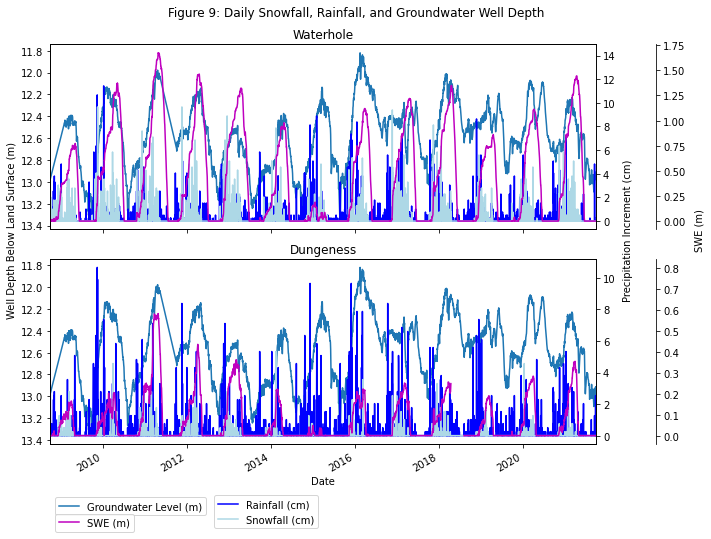

In [13]:
# Run function for Waterhole and Dungeness full period of interest 
plotwater(dfwaterhole, dfdungeness, dfwell, startdate, enddate, 'Figure 9')
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 9: Groundwater well depth from surface, SWE, rainfall, and 
snowfall for Waterhole (top) and Dungeness (bottom) over the entire period of interest (2009 - 2021 WY). At the Waterhole site, high SWE is usually correlated with a shallower depth from surface. During the melt period, groundwater depth from surface increases (i.e., less water available). The shallowest depths from surface (i.e., more groundwater available) usually follows a period of preipitation (snowfall and rainfall).</b> </div> 

### Selection of Years to Analyze 

In order to identify which conditions in the mountainous region of the Olympic Peninsula have the greatest influence on downslope groundwater levels, specific water years with maximum and minimum conditions were selected for further analysis. These included water years with: 
- Maximum SWE
- Minimum SWE
- Maximum groundwater levels 
- Minimum groundwater levels
- Snowfall dominated (more snow than rain) 
- Rainfall dominated (more rain than snow) 

Two timeseries of SWE were created for the Waterhole and Dungeness sites. Each plot includes separate lines for each year to visualize seasonal and annual changes in SWE. A similar plot was created as part of the analysis in Stamper, 2018 [9]. 

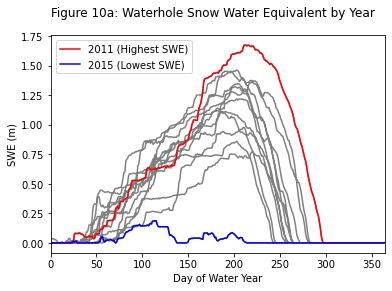

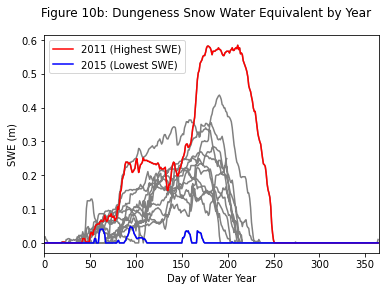

In [14]:
# Function for plotting SWE for each individual year on a single plot 
def yearlySWE(df, site, start_date, end_date): 
    
    # Calculate day of water year 
    df_year = df.copy()
    df_year['Measurement Day'] = df_year.index.dayofyear+92
    df_year['Day of Water Year'] = (df_year['Measurement Day']-365)[df_year['Measurement Day'] >= 366]
    df_year['Day of Water Year'] = df_year['Day of Water Year'].fillna(df_year['Measurement Day'] )

    # Trim dates 
    df_year = df_year[start_date:end_date]

    # Insert NaN values at end of each dataframe by replacing final date 
    # Create df of years to iterate
    dates = {'wy_end': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
    wy_end = pd.DataFrame(data = dates)
    # Create for loop to assign NaN values 
    for i, v in wy_end.iterrows(): 
        df_year.loc[datetime(v[0],9,30), 'Day of Water Year'] = np.nan 

    # Identify data for max and min SWE values  
    df_max = df_year[datetime(2010,10,1):datetime(2011,9,30)]
    df_min = df_year[datetime(2014,10,1):datetime(2015,9,30)]

    # Plot Individual Years and Years of Interest  
    fig, ax = plt.subplots()
    fig.suptitle(site + ' Snow Water Equivalent by Year')
    ax.plot(df_year['Day of Water Year'], df_year['Snow Water Equivalent (m)'], color = 'gray')
    ax.plot(df_max['Day of Water Year'], df_max['Snow Water Equivalent (m)'], color = 'red', label = '2011 (Highest SWE)')
    ax.plot(df_min['Day of Water Year'], df_min['Snow Water Equivalent (m)'], color = 'blue', label = '2015 (Lowest SWE)')

    ax.set_xlim(0, 365)
    ax.set_xlabel('Day of Water Year')
    ax.set_ylabel('SWE (m)')
    ax.legend()
    
    '''Function inputs include: 
    df = Dataframe including snow water equivalent and datetime index 
    site = Title of site as text string (in quotes) 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    
    Returns plot of snow water equivalent for each day of water year with individual lines for each year. 
    Maximum and minimum SWE years are highlighted. 
    '''

# Run function for Waterhole and Dungeness 
yearlySWE(dfwaterhole, 'Figure 10a: Waterhole', startdate, enddate)
yearlySWE(dfdungeness, 'Figure 10b: Dungeness', startdate, enddate)


<div class="alert alert-block alert-info"> <b>Figures 10a and 10b: Snow water equivalent by day of water year for 2009-2021 water years in Waterhole (8a) and Dungeness (8b). Year with max SWE is highlighted in red and year with minimum is highlighted in blue. Overall, Dungeness has much lower overall SWE for the years analyzed (<0.6 m) compared to Waterhole (<1.75 m). Both sites had the same max SWE year (2011 water year) and min SWE year (2015 water year). Compared to the other years analyzed, 2015 appeared to have significantly below average SWE at both sites.</b> </div> 

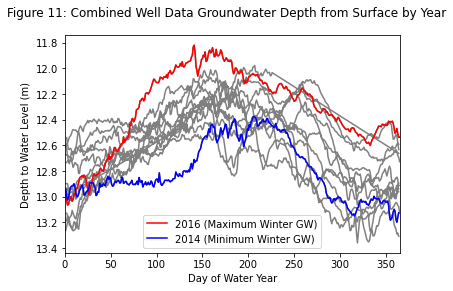

In [15]:
startdate = datetime(2008, 10, 1)
def yearlyGW(df, site, start_date, end_date): 
    
    # Calculate day of water year 
    df_year = dfwell.copy()
    df_year = df_year.loc[~df_year.index.duplicated(),:]
    df_year['Measurement Day'] = df_year.index.dayofyear+92
    df_year['Day of Water Year'] = (df_year['Measurement Day']-365)[df_year['Measurement Day'] >= 366]
    df_year['Day of Water Year'] = df_year['Day of Water Year'].fillna(df_year['Measurement Day'])
    
    # Trim dates 
    df_year = df_year[start_date:end_date]

    # Insert NaN values at end of each dataframe by replacing final date 
    # Create df of years to iterate
    dates = {'wy_end': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
    wy_end = pd.DataFrame(data = dates)
    # Create for loop to assign NaN values 
    for i, v in wy_end.iterrows(): 
        df_year.loc[datetime(v[0],9,30), 'Day of Water Year'] = np.nan 

    # Identify data for most recent year 
    df_min = df_year[datetime(2015,10,1):datetime(2016,9,30)]
    df_max = df_year[datetime(2013,10,1):datetime(2014,9,30)]

    # Plot Individual Years and Highlight Recent Year 
    fig, ax = plt.subplots()
    fig.suptitle(site + ' Groundwater Depth from Surface by Year')
    ax.plot(df_year['Day of Water Year'], df_year['Depth to Water Level (m)'], color = 'gray')
    ax.plot(df_min['Day of Water Year'], df_min['Depth to Water Level (m)'], color = 'red', label = '2016 (Maximum Winter GW)')
    ax.plot(df_max['Day of Water Year'], df_max['Depth to Water Level (m)'], color = 'blue', label = '2014 (Minimum Winter GW)')
    ax.set_xlim(0, 365)
    ax.set_xlabel('Day of Water Year')
    ax.set_ylabel('Depth to Water Level (m)')
    ax.invert_yaxis()
    ax.legend()
    
    '''Function inputs include: 
    df = Dataframe including groundwater well data and datetime index 
    site = Title of data as text string (in quotes) 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    
    Returns plot of groundwater well depth for each day of water year with individual lines for each year. 
    Maximum and minimum groundwater level years are highlighted. 
    '''    
    
yearlyGW(dfwell, 'Figure 11: Combined Well Data', startdate, enddate)


<div class="alert alert-block alert-info"> <b>Figure 11: Groundwater depth from surface by day of water year for 2009-2021 water years. Year with max groundwater depth is highlighted in red and year with minimum is highlighted in blue. No clear minimum trendline was present so the year with the greatest depth to water level in the winter was selected. The 2012 water year had a significant portion of filled data and was excluded from annual analysis. </b> </div> 

The sum of annual precipitation, rainfall, and snowfall was calculated to identify overall trends from year to year. In addition, the snow/rain fraction was calculated to identify years with more snow vs more rain. From the resulting table, years with similar cumulative precipitation but different ratios of snowfall to rainfall were selected for further analysis. 

In [16]:
def preciptypes(df, start_date, end_date):  
    
    # Identify Water Year 
    dfprecip = df.copy()
    dfprecip = dfprecip[start_date:end_date]
    dfprecip['Water_Year'] = dfprecip.index.year.where(dfprecip.index.month < 10, dfprecip.index.year + 1)
    
    # Group by and sum by water year 
    dfprecip = dfprecip.groupby(['Water_Year'])[['Rainfall', 'Snowfall', 'Precipitation Increment (cm)']].apply(sum)
    
    # Calculate rain/snow fraction 
    dfprecip['Snow/Rain Fraction'] = dfprecip['Snowfall']/dfprecip['Rainfall']
        
    display(dfprecip)
    
    '''Function inputs include: 
    df = Dataframe including Snowfall and Rainfall columns resampled to yearly sum 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    
    Returns dataframe including "Snow/Rain Fraction" which describes the ratio of snowfall to rainfall for a given year'''
    
    return dfprecip

print('Waterhole')
print('Years with similar precipitation included 2021 (165.86 cm) and 2015 (167.89 cm)')
print('Years with similar 2021 had more snow than rain (146%) and 2015 had more rain than snow (25.0%)')
dfprecipw = preciptypes(dfwaterhole,startdate, enddate) 
# print('')
print('Dungeness')
print('Years with similar precipitation included 2012 (118.62 cm) and 2019 (118.36 cm)')
print('Years with similar 2012 had more snow than rain (38.2%) and 2019 had more rain than snow (13.1%)')
dfprecipd = preciptypes(dfdungeness, startdate, enddate)

Waterhole
Years with similar precipitation included 2021 (165.86 cm) and 2015 (167.89 cm)
Years with similar 2021 had more snow than rain (146%) and 2015 had more rain than snow (25.0%)


,Rainfall,Snowfall,Precipitation Increment (cm),Snow/Rain Fraction
Water_Year,,,,
2009,43.688,92.710,136.652,2.122093
2010,89.916,129.032,218.948,1.435028
2011,79.756,141.224,220.980,1.770701
2012,68.072,124.968,193.040,1.835821
2013,91.440,112.522,203.962,1.230556
2014,64.262,78.232,142.494,1.217391
2015,134.366,33.528,167.894,0.249527
2016,121.666,98.298,219.964,0.807933
2017,115.062,105.664,220.726,0.918322


Dungeness
Years with similar precipitation included 2012 (118.62 cm) and 2019 (118.36 cm)
Years with similar 2012 had more snow than rain (38.2%) and 2019 had more rain than snow (13.1%)


,Rainfall,Snowfall,Precipitation Increment (cm),Snow/Rain Fraction
Water_Year,,,,
2009,65.278,19.558,85.344,0.299611
2010,157.480,19.050,176.530,0.120968
2011,108.458,39.116,147.574,0.360656
2012,85.852,32.766,118.618,0.381657
2013,106.934,25.400,132.334,0.237530
2014,72.898,13.208,86.106,0.181185
2015,125.476,3.810,129.286,0.030364
2016,142.748,16.002,158.750,0.112100
2017,126.746,21.590,148.336,0.170341


### Analysis for Selected Years 

Groundwater levels, SWE, snowfall and rainfall at the SNOTEL sites were plotted to identify correlation between precipitation in the mountainous region south of Sequim, WA and the groundwater levels near the coast. Several conditions were explored including: maximum and minimum SWE years, maximum and minimum well level depths, and years with varying ratios of snowfall and rainfall. 

In addition to plotting the data, a metric was selected to identify the lag time between rainfall and snowmelt trends in the mountains influencing groundwater levels downslope. The lag to peak groundwater level (shallowest depth from surface) describes the number of days (as a decimal) between a specific date and the peak groundwater level. The lag to peak was calculated for the rainfall precipitation centroid and and the day with 50% remaining SWE for 1 water year. The precipitation centroid and lag to peak were calculated using a methods from ESCI 895 Lab 9 Course Material. Lag to peak greater than 

In [17]:
# Create table for years selected in analysis 
data = [['Max SWE Year'], ['Min SWE Year'], ['Max Groundwater Year'], ['Min Groundwater Year'], ['Snowfall Dominated Year'], 
        ['Rainfall Dominated Year']]
dfanalysisw = pd.DataFrame(data, columns = ['Year'])
dfanalysisw['WY'] = [2012, 2015, 2016, 2014, 2021, 2015]
dfanalysisw['Day of Peak GW'] = 9999
dfanalysisw['Rainfall Lag to Peak'] = 9999
dfanalysisw['Rainfall Centroid'] = 9999
dfanalysisw['50% SWE Lag to Peak'] = 9999
dfanalysisw['Day of 50% SWE'] = 9999

dfanalysisd = pd.DataFrame(data, columns = ['Year'])
dfanalysisd['WY'] = [2012, 2015, 2016, 2014, 2012, 2019]
dfanalysisd['Day of Peak GW'] = 9999
dfanalysisd['Rainfall Lag to Peak'] = 9999
dfanalysisd['Rainfall Centroid'] = 9999
dfanalysisd['50% SWE Lag to Peak'] = 9999
dfanalysisd['Day of 50% SWE'] = 9999

# Create table for analysis of all years 
dates = {'WY': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
dfresultsw = pd.DataFrame(dates['WY'], columns = ['Water Year'])
dfresultsw['Day of Peak GW'] = 9999
dfresultsw['Rainfall Lag to Peak'] = 9999
dfresultsw['Rainfall Centroid'] = 9999
dfresultsw['50% SWE Lag to Peak'] = 9999
dfresultsw['Day of 50% SWE'] = 9999

dfresultsd = pd.DataFrame(dates['WY'], columns = ['Water Year'])
dfresultsd['Day of Peak GW'] = 9999
dfresultsd['Rainfall Lag to Peak'] = 9999
dfresultsd['Rainfall Centroid'] = 9999
dfresultsd['50% SWE Lag to Peak'] = 9999
dfresultsd['Day of 50% SWE'] = 9999

print('Success')


Success


In [18]:
# Function to calculate lag to peak for rainfall and 50% SWE 
def analyzestorm(df1, df2, stormstart, stormend):         
    df1t = df1.copy()
    df1t = df1t[stormstart:stormend]
    df1t['seconds'] = df1t.index.view('int64')/1e9
    precip_centroid = sum(df1t['seconds'] * df1t['Rainfall']) / sum(df1t['Rainfall'])
    precip_centroid_DT = pd.Timestamp(precip_centroid, unit = 's')
    df2t = df2[stormstart:stormend]
    peakGW_time = df2t.loc[stormstart:stormend, 'Depth to Water Level (m)'].idxmin()
    lag_time = peakGW_time - precip_centroid_DT 
    lag_time_dec = lag_time.days + (lag_time.seconds/86400)
    
    df1t['Percent SWE'] = df1t['Snow Water Equivalent (m)']/df1t['Snow Water Equivalent (m)'].max()
    value = 0.5 #50%
    halfSWE = abs(df1t['Percent SWE'] - value).idxmin()    
    
    lag_time_snow = peakGW_time - halfSWE 
    lag_time_dec_snow = lag_time_snow.days + (lag_time_snow.seconds/86400)
            
    '''Function inputs include: 
    df1 = Dataframe including precipitation data (i.e., snowfall, rainfall, cumulative precipitation) and datetime index 
    df2 = Dataframe including groundwater well depth data 
    start_date = Start date as datetime index 
    end_date = End date as datetime index 
    
    Prints groundwater peak date, rainfall precipitation centroid date, rainfall precipitation centroid lag to peak 
    well level, date off 50% SWE, and 50% SWE lag to peak well level 
    Returns rainfall centroid lag to peak, 50% SWE lag to peak, date of peak groundwater, date of rainfall precipitation 
    centroid, and date of 50% SWE
    '''
    
    return (round(lag_time_dec,2), round(lag_time_dec_snow,2), peakGW_time, precip_centroid_DT, halfSWE)

print('Success')


Success


In [19]:
# Create function with for loop to calculate yearly precipitation 
def resultsanalysis(df1, df2, df3, dates): 
    for i, v in dates.iterrows(): 
        rainfall_lag, half_swe_lag, peakGW_time, precip_centroid_DT, halfSWE = analyzestorm(df1, df2, datetime(v[0],10,1), 
                                                                                            datetime(v[1],9,30))
        df3.iloc[i, df3.columns.get_loc('Rainfall Lag to Peak')] = rainfall_lag
        df3.iloc[i, df3.columns.get_loc('50% SWE Lag to Peak')] = half_swe_lag
        df3.iloc[i, df3.columns.get_loc('Day of Peak GW')] = peakGW_time
        peakGW_time = pd.to_datetime(peakGW_time)
        df3.iloc[i, df3.columns.get_loc('Rainfall Centroid')] = precip_centroid_DT
        precip_centroid_DT = pd.to_datetime(precip_centroid_DT)
        df3.iloc[i, df3.columns.get_loc('Day of 50% SWE')] = halfSWE
        halfSWE = pd.to_datetime(halfSWE)
        
    '''Function inputs include: 
    df1 = Dataframe including precipitation data, SWE, and datetime index 
    df2 = Dataframe including groundwater well depth data 
    df3 = Output dataframe including results data 
    
    Returns df3 (output dataframe) 
    '''
    
    return df3

print('Success')


Success


In [20]:
# Specify dates for analysis and run function to calculate results 
dates2 = {'wy_start': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], 
         'wy_end': [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]}
wy_end = pd.DataFrame(data = dates2)
dfresultsw = resultsanalysis(dfwaterhole, dfwell, dfresultsw, wy_end)
dfresultsd = resultsanalysis(dfdungeness, dfwell, dfresultsd, wy_end)
    
datesw = {'wy_start': [2011, 2014, 2015, 2013, 2020, 2014], 
         'wy_end': [2012, 2015, 2016, 2014, 2021, 2015]}
wy_endw = pd.DataFrame(data = datesw)
dfanalysisw = resultsanalysis(dfwaterhole, dfwell, dfanalysisw, wy_endw)

datesd = {'wy_start': [2011, 2014, 2015, 2013, 2011, 2018], 
         'wy_end': [2012, 2015, 2016, 2014, 2012, 2019]}
wy_endd = pd.DataFrame(data = datesd)
dfanalysisd = resultsanalysis(dfdungeness, dfwell, dfanalysisd, wy_endd)
##### For loop and store in ith row for ith column, replace value in iloc and loop through years using the same method 
##### Use list of years starting in 2008, 9, 10, etc. Give analyze storm the first year
print('Success')


Success


In [21]:
def printresults(df, row): 
    print('The groundwater peak occurs on', df.iloc[row,2].strftime('%m/%d/%y'))
    print('The rainfall precipitation centroid occurs on', df.iloc[row,4].strftime('%m/%d/%y'))
    print('The rainfall precipitation centroid lag to peak well level is', df.iloc[row,3], 'days')
    print('The date of 50% SWE is', df.iloc[row,6].strftime('%m/%d/%y'))
    print('The 50% SWE lag to peak well level is', df.iloc[row,5], 'days')
    
    '''Function inputs include: 
    df = Dataframe containing analysis outputs for groundwater peak, rainfall precipitation centroid, 
    and SWE melt period 
    row = Row in dataframe to be analyzed 
    
    Returns print statments describing date and lag to peak for each requested row. 
    '''
    
printresults(dfanalysisw, 0)


The groundwater peak occurs on 05/03/12
The rainfall precipitation centroid occurs on 02/08/12
The rainfall precipitation centroid lag to peak well level is 84.11 days
The date of 50% SWE is 06/16/12
The 50% SWE lag to peak well level is -44 days


YEAR WITH MAX SWE

Waterhole 2012 Water Year
The groundwater peak occurs on 05/03/12
The rainfall precipitation centroid occurs on 02/08/12
The rainfall precipitation centroid lag to peak well level is 84.11 days
The date of 50% SWE is 06/16/12
The 50% SWE lag to peak well level is -44 days

Dungeness 2012 Water Year
The groundwater peak occurs on 05/03/12
The rainfall precipitation centroid occurs on 02/09/12
The rainfall precipitation centroid lag to peak well level is 83.44 days
The date of 50% SWE is 04/30/12
The 50% SWE lag to peak well level is 3 days


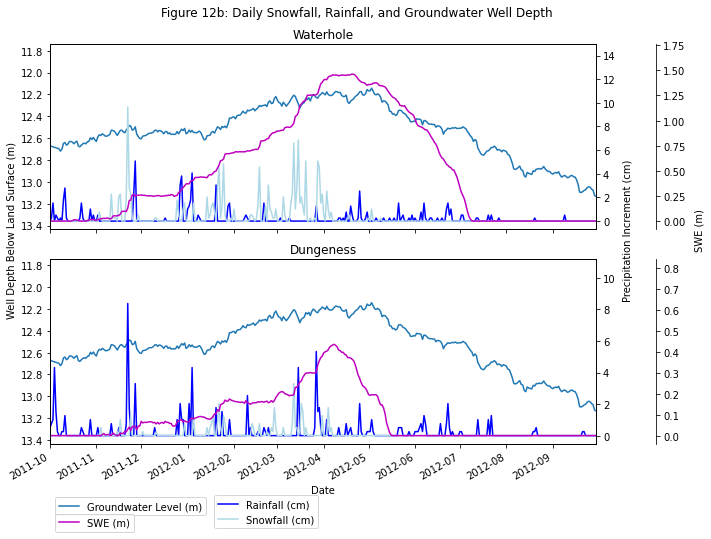

In [22]:
# Run function for max SWE year 
print('YEAR WITH MAX SWE')
print('')
print('Waterhole 2012 Water Year')
printresults(dfanalysisw, 0)

print('')
print('Dungeness 2012 Water Year')
printresults(dfanalysisd, 0)

plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2011,10,1), datetime(2012,9,30), 'Figure 12b')
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 12b: Groundwater well depth from surface, SWE, rainfall, and snowfall for Waterhole (top) and Dungeness (bottom) for year with max SWE / 2012 water year (note: year with max SWE was missing significant portion of well data so year with 2nd highest SWE was chosen).</b> </div> 

YEAR WITH MIN SWE

Waterhole 2015 Water Year
The groundwater peak occurs on 03/23/15
The rainfall precipitation centroid occurs on 01/13/15
The rainfall precipitation centroid lag to peak well level is 68.44 days
The date of 50% SWE is 12/22/14
The 50% SWE lag to peak well level is 91 days

Dungeness 2015 Water Year
The groundwater peak occurs on 03/23/15
The rainfall precipitation centroid occurs on 01/24/15
The rainfall precipitation centroid lag to peak well level is 57.79 days
The date of 50% SWE is 12/05/14
The 50% SWE lag to peak well level is 108 days


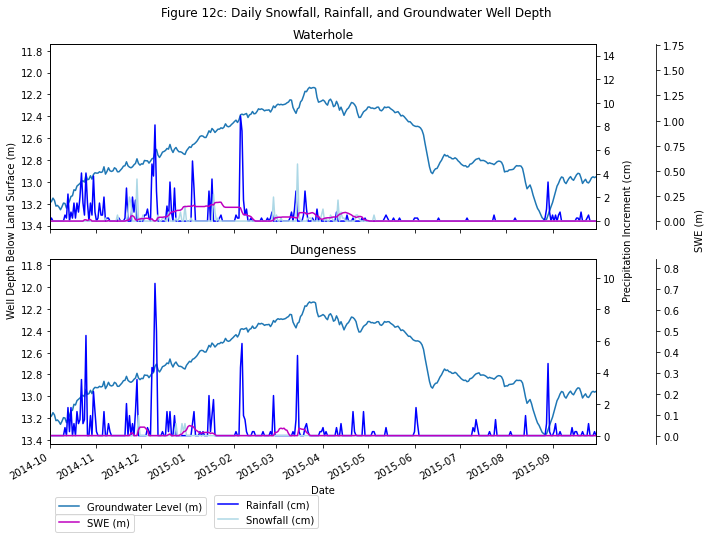

In [23]:
# Run function for min SWE year 
print('YEAR WITH MIN SWE')
print('')
print('Waterhole 2015 Water Year')
printresults(dfanalysisw, 1)

print('')
print('Dungeness 2015 Water Year')
printresults(dfanalysisd, 1)

plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2014,10,1), datetime(2015,9,30), 'Figure 12c')
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 12c: Groundwater well depth from surface, SWE, rainfall, and snowfall for Waterhole (top) and Dungeness (bottom) for year with minimum SWE.</b> </div> 

YEAR WITH MAX GROUNDWATER LEVEL (shorter depth from ground surface)

Waterhole 2016 Water Year
The groundwater peak occurs on 02/18/16
The rainfall precipitation centroid occurs on 01/27/16
The rainfall precipitation centroid lag to peak well level is 21.51 days
The date of 50% SWE is 12/24/15
The 50% SWE lag to peak well level is 56 days

Dungeness 2016 Water Year
The groundwater peak occurs on 02/18/16
The rainfall precipitation centroid occurs on 01/25/16
The rainfall precipitation centroid lag to peak well level is 23.21 days
The date of 50% SWE is 12/18/15
The 50% SWE lag to peak well level is 62 days


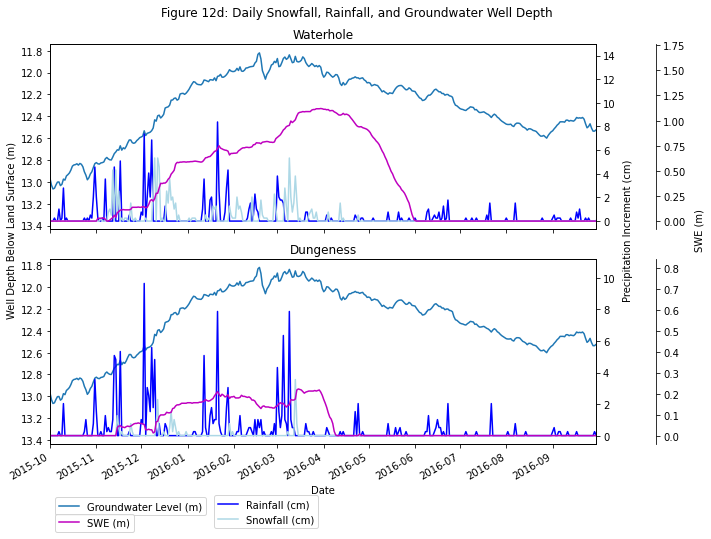

In [24]:
# Run function for max GW year 
print('YEAR WITH MAX GROUNDWATER LEVEL (shorter depth from ground surface)')
print('')
print('Waterhole 2016 Water Year')
printresults(dfanalysisw, 2)

print('')
print('Dungeness 2016 Water Year')
printresults(dfanalysisd, 2)

plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2015,10,1), datetime(2016,9,30), 'Figure 12d')
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 12d: Groundwater well depth from surface, SWE, rainfall, and snowfall for Waterhole (top) and Dungeness (bottom) for year with the shallowest well depth from surface (greatest depth).</b> </div> 

YEAR WITH MIN GROUNDWATER LEVEL (larger depth from ground surface)

Waterhole 2014 Water Year
The groundwater peak occurs on 04/24/14
The rainfall precipitation centroid occurs on 03/20/14
The rainfall precipitation centroid lag to peak well level is 34.4 days
The date of 50% SWE is 05/31/14
The 50% SWE lag to peak well level is -37 days

Dungeness 2014 Water Year
The groundwater peak occurs on 04/24/14
The rainfall precipitation centroid occurs on 03/27/14
The rainfall precipitation centroid lag to peak well level is 27.2 days
The date of 50% SWE is 02/15/14
The 50% SWE lag to peak well level is 68 days


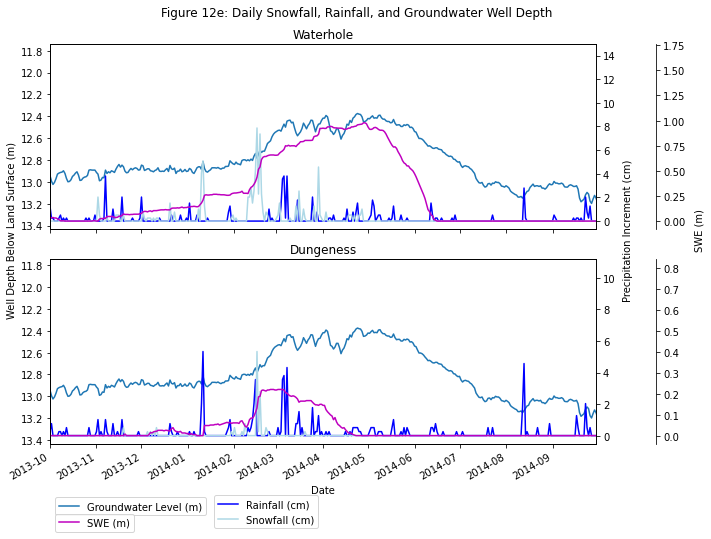

In [25]:
# Run function for min GW year 
print('YEAR WITH MIN GROUNDWATER LEVEL (larger depth from ground surface)')
print('')
print('Waterhole 2014 Water Year')
printresults(dfanalysisw, 3)

print('')
print('Dungeness 2014 Water Year')
printresults(dfanalysisd, 3)

plotwater(dfwaterhole, dfdungeness, dfwell, datetime(2013,10,1), datetime(2014,9,30), 'Figure 12e')
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 12e: Groundwater well depth from surface, SWE, rainfall, and snowfall for Waterhole (top) and Dungeness (bottom) for year with deepest well depth from surface (shallowest depth).</b> </div> 

For each location, two years with similar maximum precipitation were selected: one with more snow than rain and one with more rain than snow. Both were plotted to compare the influence of each precipitaiton type on groundwater levels. 

WATERHOLE YEAR WITH MORE SNOWFALL THAN RAINFALL

Waterhole 2021 Water Year
The groundwater peak occurs on 03/05/21
The rainfall precipitation centroid occurs on 01/27/21
The rainfall precipitation centroid lag to peak well level is 36.45 days
The date of 50% SWE is 05/31/21
The 50% SWE lag to peak well level is -87 days


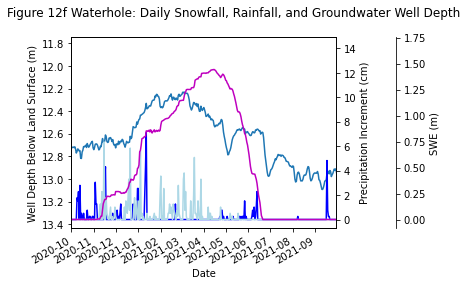

WATERHOLE YEAR WITH MORE RAINFALL THAN SNOWFALL

Waterhole 2015 Water Year
The groundwater peak occurs on 03/23/15
The rainfall precipitation centroid occurs on 01/13/15
The rainfall precipitation centroid lag to peak well level is 68.44 days
The date of 50% SWE is 12/22/14
The 50% SWE lag to peak well level is 91 days


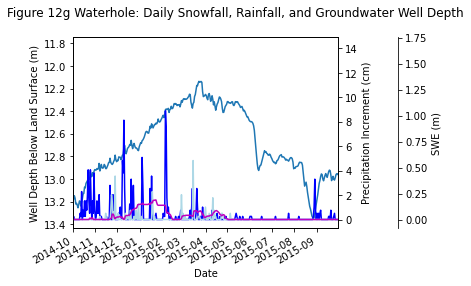

In [26]:
# Run function for Waterhole Snowfall Year and Rainfall Year 
print('WATERHOLE YEAR WITH MORE SNOWFALL THAN RAINFALL')
print('')
print('Waterhole 2021 Water Year')
printresults(dfanalysisw, 4)

plotwater1(dfwaterhole, dfwell, datetime(2020,10,1), datetime(2021,9,30), 'Figure 12f Waterhole')
plt.show()

print('WATERHOLE YEAR WITH MORE RAINFALL THAN SNOWFALL')
print('')
print('Waterhole 2015 Water Year')
printresults(dfanalysisw, 5)

plotwater1(dfwaterhole, dfwell, datetime(2014,10,1), datetime(2015,9,30), 'Figure 12g Waterhole')
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 12f and 12g: Groundwater well depth from surface, SWE, rainfall, and snowfall for Waterhole for year with more snowfall than rainfall (12f) and year with more rainfall than snowfall (12g). Both years selected had similar amounts of combined precipitation for the entire water year.</b> </div> 

DUNGENESS YEAR WITH MORE SNOWFALL THAN RAINFALL

Dungeness 2012 Water Year
The groundwater peak occurs on 05/03/12
The rainfall precipitation centroid occurs on 02/09/12
The rainfall precipitation centroid lag to peak well level is 83.44 days
The date of 50% SWE is 04/30/12
The 50% SWE lag to peak well level is 3 days


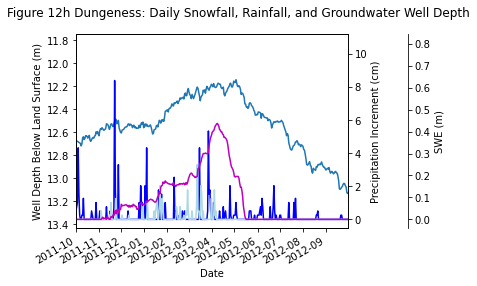

DUNGENESS YEAR WITH MORE RAINFALL THAN SNOWFALL

Dungeness 2019 Water Year
The groundwater peak occurs on 06/07/19
The rainfall precipitation centroid occurs on 02/18/19
The rainfall precipitation centroid lag to peak well level is 108.22 days
The date of 50% SWE is 02/10/19
The 50% SWE lag to peak well level is 117 days


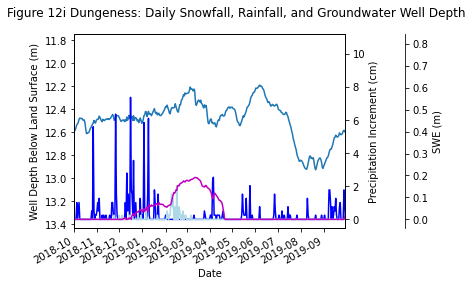

In [27]:
# Run function for Dungeness Snowfall Year and Rainfall Year
print('DUNGENESS YEAR WITH MORE SNOWFALL THAN RAINFALL')
print('')
print('Dungeness 2012 Water Year')
printresults(dfanalysisd, 4)

##### For loop and store in ith row for ith column, replace value in iloc and loop through years using the same method 
##### Use list of years starting in 2008, 9, 10, etc. Give analyze storm the first year

plotwater1(dfdungeness, dfwell, datetime(2011,10,1), datetime(2012,9,30), 'Figure 12h Dungeness')
plt.show()

print('DUNGENESS YEAR WITH MORE RAINFALL THAN SNOWFALL')
print('')
print('Dungeness 2019 Water Year')
printresults(dfanalysisd, 5)

plotwater1(dfdungeness, dfwell, datetime(2018,10,1), datetime(2019,9,30), 'Figure 12i Dungeness')
plt.show()

<div class="alert alert-block alert-info"> <b>Figure 12h and 12i: Groundwater well depth from surface, SWE, rainfall, and snowfall for Dungeness for year with more snowfall than rainfall (12h) and year with more rainfall than snowfall (12i). Both years selected had similar amounts of combined precipitation for the entire water year.</b> </div> 

# Results

## Lag to Peak Results for Specified Years

Results from the lag to peak analysis for specific years are summarized for each site: 

In [28]:
display(dfanalysisw)
display(dfanalysisd)

,Year,WY,Day of Peak GW,Rainfall Lag to Peak,Rainfall Centroid,50% SWE Lag to Peak,Day of 50% SWE
0,Max SWE Year,2012,2012-05-03 00:00:00,84.11,2012-02-08 21:18:48.358209848,-44,2012-06-16 00:00:00
1,Min SWE Year,2015,2015-03-23 00:00:00,68.44,2015-01-13 13:23:01.474478483,91,2014-12-22 00:00:00
2,Max Groundwater Year,2016,2016-02-18 00:00:00,21.51,2016-01-27 11:40:27.557409286,56,2015-12-24 00:00:00
3,Min Groundwater Year,2014,2014-04-24 00:00:00,34.40,2014-03-20 14:25:08.300396442,-37,2014-05-31 00:00:00
4,Snowfall Dominated Year,2021,2021-03-05 00:00:00,36.45,2021-01-27 13:13:21.509433746,-87,2021-05-31 00:00:00
5,Rainfall Dominated Year,2015,2015-03-23 00:00:00,68.44,2015-01-13 13:23:01.474478483,91,2014-12-22 00:00:00


,Year,WY,Day of Peak GW,Rainfall Lag to Peak,Rainfall Centroid,50% SWE Lag to Peak,Day of 50% SWE
0,Max SWE Year,2012,2012-05-03 00:00:00,83.44,2012-02-09 13:29:28.047336340,3,2012-04-30 00:00:00
1,Min SWE Year,2015,2015-03-23 00:00:00,57.79,2015-01-24 05:08:59.271253824,108,2014-12-05 00:00:00
2,Max Groundwater Year,2016,2016-02-18 00:00:00,23.21,2016-01-25 18:55:05.338079214,62,2015-12-18 00:00:00
3,Min Groundwater Year,2014,2014-04-24 00:00:00,27.20,2014-03-27 19:19:01.463415146,68,2014-02-15 00:00:00
4,Snowfall Dominated Year,2012,2012-05-03 00:00:00,83.44,2012-02-09 13:29:28.047336340,3,2012-04-30 00:00:00
5,Rainfall Dominated Year,2019,2019-06-07 00:00:00,108.22,2019-02-18 18:45:26.213589907,117,2019-02-10 00:00:00


### Summary of Results for Waterhole Site 
The shortest rainfall lag to peak groundwater level occurred during the 2016 water year which had the maximum groundwater level. The lag was 21.5 days between the rainfall centroid and the peak groundwater level. For this water year, the 50% SWE lag to peak was 56 days, meaning that the majority of snowmelt occurred prior to peak groundwater. 

The second shortest was in 2014 during the minimum groundwater year. The lag was 34.4 days between the centroid and peak groundwater level. For this water year, the 50% SWE lag to peak was -37 days, meaning that the majority of the snowmelt occurred after peak groundwater and during a period of groundwater depletion. 

The third shortest was in 2021 during the snowfall dominated year. The lag between the centroid and peak groundwater level was 36.5 days. For this water year, the 50% SWE lag to peak was -87 days, meaning snowmelt occurred long after the peak groundwater level and during a period of groundwater depletion. 

The greatest rainfall lag to peak occurred during the max SWE year in 2012. The lag between the centroid and peak groundwater level was 84.1 days. For this water year, the 50% SWE lag to peak was -44 days, meaning the majority of snowmelt occurred after peak groundwater and during a period of groundwater depletion. 

### Summary of Results for Dungeness Site 
The shortest rainfall lag to peak groundwater occurred during the 2016 water year which had the maximum groundwater level. The lag between the rainfall centroid and peak groundwater level was 23.2 days. For this water year, the 50% SWE lag to peak was 62 days, indicating that the majority of snowmelt occurred prior to peak groundwater. Both the Waterhole and Dungeness sites had the shortest lag to peak during this water year. 

The second shortest was in 2014 during the minimum groundwater year. The lag between the rainfall centroid and peak groundwater was 27.2 days. For thsi water year, the 50% SWE lag to peak was 68 days, indicating that the majority of snowmelt occurred prior to the peak groundwater. Both the Waterhole and Dungeness sites had the shortest lag to peak during this water year. 

The third shortest was in 2015 for the minimum SWE year. The lag between the rainfall centroid and peak groundwater was 57.8 days. For this water year, the 50% SWE lag to peak was 108 days, indicating that the majority of snowmelt occurred long before the peak groundwater. 

The longest rainfall lag to peak occurred during the 2019 rainfall dominated water year. The lag between the rainfall centroid and peak groundwater was 108.2 days. For this water year, the 50% SWE lag to peak was 117 days, indicating that the majority of snowmelt occurred long before peak groundwater. 


## Lag to Peak Results for All Years

In addition to years that met specific conditions of interest, the lag to peak analysis was completed for all study years. Both lag to peak for rainfall precipitation centroid and day of 50% SWE were calculated. A plot was created to illustrate the stability of each condition from year to year (i.e., if peak conditions occurred at the same time every year or changed). 

In [29]:
# Prints results from analysis of all years
print('Full Period of Record for Waterhole')
display(dfresultsw)
print('Full Period of Record for Dungeness')
display(dfresultsd)

Full Period of Record for Waterhole


,Water Year,Day of Peak GW,Rainfall Lag to Peak,Rainfall Centroid,50% SWE Lag to Peak,Day of 50% SWE
0,2009,2009-04-02 00:00:00,63.55,2009-01-28 10:53:01.395349026,60,2009-02-01 00:00:00
1,2010,2010-02-04 00:00:00,12.20,2010-01-22 19:07:07.118643761,13,2010-01-22 00:00:00
2,2011,2011-04-25 00:00:00,69.57,2011-02-14 10:23:41.656049967,62,2011-02-22 00:00:00
3,2012,2012-05-03 00:00:00,84.11,2012-02-08 21:18:48.358209848,-44,2012-06-16 00:00:00
4,2013,2013-03-20 00:00:00,-7.15,2013-03-27 03:31:59.999999046,-78,2013-06-06 00:00:00
5,2014,2014-04-24 00:00:00,34.40,2014-03-20 14:25:08.300396442,-37,2014-05-31 00:00:00
6,2015,2015-03-23 00:00:00,68.44,2015-01-13 13:23:01.474478483,91,2014-12-22 00:00:00
7,2016,2016-02-18 00:00:00,21.51,2016-01-27 11:40:27.557409286,56,2015-12-24 00:00:00
8,2017,2017-06-19 00:00:00,165.49,2017-01-04 12:11:07.549667835,161,2017-01-09 00:00:00
9,2018,2018-03-08 00:00:00,45.85,2018-01-21 03:36:23.606555700,46,2018-01-21 00:00:00


Full Period of Record for Dungeness


,Water Year,Day of Peak GW,Rainfall Lag to Peak,Rainfall Centroid,50% SWE Lag to Peak,Day of 50% SWE
0,2009,2009-04-02 00:00:00,48.09,2009-02-12 21:45:31.517509460,70,2009-01-22 00:00:00
1,2010,2010-02-04 00:00:00,8.75,2010-01-26 06:02:19.354839563,35,2009-12-31 00:00:00
2,2011,2011-04-25 00:00:00,79.15,2011-02-04 20:17:25.433254719,52,2011-03-04 00:00:00
3,2012,2012-05-03 00:00:00,83.44,2012-02-09 13:29:28.047336340,3,2012-04-30 00:00:00
4,2013,2013-03-20 00:00:00,6.55,2013-03-13 10:53:18.099761009,-32,2013-04-21 00:00:00
5,2014,2014-04-24 00:00:00,27.20,2014-03-27 19:19:01.463415146,68,2014-02-15 00:00:00
6,2015,2015-03-23 00:00:00,57.79,2015-01-24 05:08:59.271253824,108,2014-12-05 00:00:00
7,2016,2016-02-18 00:00:00,23.21,2016-01-25 18:55:05.338079214,62,2015-12-18 00:00:00
8,2017,2017-06-19 00:00:00,165.15,2017-01-04 20:26:27.174347162,73,2017-04-07 00:00:00
9,2018,2018-03-08 00:00:00,43.61,2018-01-23 09:26:43.960395098,108,2017-11-20 00:00:00


In [30]:
# Converts timestamps in results output to day of water year for plotting time stability 
def resultsfixdate(df):
    df['Day of Peak GW'] = pd.to_datetime(df['Day of Peak GW'], format = ('%Y-%m-%d'))
    df['Rainfall Centroid'] = pd.to_datetime(df['Rainfall Centroid'], format = ('%Y-%m-%d'))
    df['Day of 50% SWE'] = pd.to_datetime(df['Day of 50% SWE'], format = ('%Y-%m-%d'))

    df['Day of Peak GW DOY'] = df['Day of Peak GW'].dt.dayofyear+92
    df['Rainfall Centroid DOY'] = df['Rainfall Centroid'].dt.dayofyear+92
    df['Day of 50% SWE DOY'] = df['Day of 50% SWE'].dt.dayofyear+92

    df['Day of Peak GW DOWY'] = (df['Day of Peak GW DOY']-365)[df['Day of Peak GW DOY'] >= 366]
    df['Day of Peak GW DOWY'] = df['Day of Peak GW DOWY'].fillna(df['Day of Peak GW DOY'] )

    df['Rainfall Centroid DOWY'] = (df['Rainfall Centroid DOY']-365)[df['Rainfall Centroid DOY'] >= 366]
    df['Rainfall Centroid DOWY'] = df['Rainfall Centroid DOWY'].fillna(df['Rainfall Centroid DOY'] )

    df['Day of 50% SWE DOWY'] = (df['Day of 50% SWE DOY']-365)[df['Day of 50% SWE DOY'] >= 366]
    df['Day of 50% SWE DOWY'] = df['Day of 50% SWE DOWY'].fillna(df['Day of 50% SWE DOY'] )
    
    '''Function inputs include: 
    df = Dataframe with day of peak gw, rainfall centroid, and day of 50% SWE. 
    
    Returns data frame with day of water year for peak gw, rainfall centroid, and day of 50% SWE. 
    '''
    
    return(df)

dfresultswy_w = resultsfixdate(dfresultsw)
dfresultswy_d = resultsfixdate(dfresultsd)


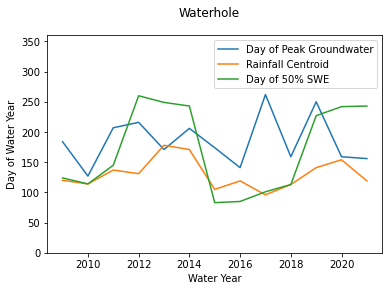

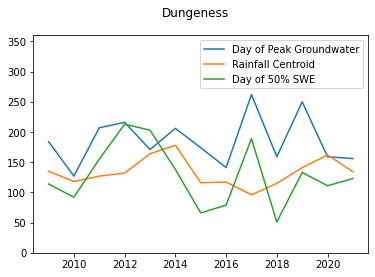

In [31]:
# Plots changes in peak gw, rainfall centroid, and day of 50% SWE timing from year to year over the period of study
fig, ax = plt.subplots()
fig.suptitle('Waterhole')
ax.set_xlabel('Water Year') 
ax.set_ylabel('Day of Water Year')
ax.set_ylim(bottom = 0, top = 360)
ax.plot(dfresultswy_w['Water Year'], dfresultswy_w['Day of Peak GW DOWY'], label = 'Day of Peak Groundwater')
ax.plot(dfresultswy_w['Water Year'], dfresultswy_w['Rainfall Centroid DOWY'], label = 'Rainfall Centroid')
ax.plot(dfresultswy_w['Water Year'], dfresultswy_w['Day of 50% SWE DOWY'], label = 'Day of 50% SWE')
ax.legend()
plt.show()

fig2, ax2 = plt.subplots()
fig2.suptitle('Dungeness')
ax2.set_ylim(bottom = 0, top = 360)
ax2.plot(dfresultswy_d['Water Year'], dfresultswy_d['Day of Peak GW DOWY'], label = 'Day of Peak Groundwater')
ax2.plot(dfresultswy_d['Water Year'], dfresultswy_d['Rainfall Centroid DOWY'], label = 'Rainfall Centroid')
ax2.plot(dfresultswy_d['Water Year'], dfresultswy_d['Day of 50% SWE DOWY'], label = 'Day of 50% SWE')

ax2.legend()
plt.show()


### Summary of Results for Waterhole Site 
The day of peak groundwater (blue) flucctuates between the ~125 - 250th day of the water year. In nearly all cases, when it the peak occurs later in one year, it will be earlier the next. In comparison, the rainfall centroid (orange) is more consistent, ranging from the  ~70 - 175th day of the year. The rainfall centroid has the least variability of all three parameters. The day of 50% SWE (green) has the most variation, fluctuating between the ~275 - 60th day of the water year. Prior to 2015, the melt seemed to be occurring later. Between 2015 and 2018, the melt period was occurring much earlier in the water year. 

### Summary of Results for Dungeness Site 
Peak groundwater data is the same for both plots. At the Dungeness Site, the rainfall centroid had relatively low variability compared to the day of peak groundwater and day of 50% SWE, ranging from the ~180 - 80th day of the water year. Day of 50% SWE was also variable, but appeared to occurr at similar times as the day of peak groundwater, indicating that the majority of the melt period in Dungeness occurred following the date of peak groundwater. 

# Discussion 
Both sites had their first and second shortest rainfall lag to peak groundwater level for the maximum groundwater and minimum groundwater years, respectively. Even the shortest lag time, however, was greater than 20 days, suggesting that rainfall in the mountains takes time to infiltrate the groundwater near the downslope monitoring station. 

In contrast, when comparing a snowfall and rainfall dominated year with similar cumulative precipitation, both sites showed significantly lower lag to peak for both rainfall and snowmelt for the snowfall dominated year. The snowfall dominated year in Waterhole (2021) had a rainfall lag to peak of 36.5 days and a snowmelt lag to peak of -87 days. The rainfall dominated year in Waterhole (2015) had a rainfall lag to peak of 68.4 days and a snowmelt lag to peak of 91 days. The snowfall dominated year in Dungeness (2012) had a rainfall lag to peak of 83.4 days and a snowmelt lag to peak of only 3 days. The rainfall dominated year in Dungeness (2019) had a rainfall lag ot peak of 108.2 days and a snowmelt lag to peak of 117 days. 

At the Waterhole site, the majority of snowmelt often occurs after the peak groundwater and does not seem to have a major influence on downslope groundwater recharge. In fact, snowmelt at the Waterhole site often occurs when groundwater levels are decreasing. It is possible that local conditions at the groundwater monitoring stations (e.g., local precipitation, groundwater withdrawls) have a greater influence on groundwater levels than conditions in the mountains. At the Dungeness site, none of the snowmelt lag to peak values are negative, despite overall SWE values being lower at this site (Figure 6). With the exception of the max SWE year and snowfall dominated year, snowfall lag to peak is greater at the Dungeness site than the Waterhole site. 



# Conclusion
It is clear that the correlation between mountanous conditions and downslope groundwater levels is influenced by more than just the factors considered in this analysis. While it is possible that rainfall and SWE melt influence groundwater recharge and stability (i.e., prevented decrease in well level), it was difficult to descern any clear connections between the data at the SNOTEL gages and the groundwater monitoring well downslope. 

Future studies could use the method outlined in this report to calculate lag to peak for a variety of factors (e.g., peak winter air temperature) to further explore the drivers of groundwater recharge at the monitoring well. 

This study did not consider the influence of mountain rainfall and snowmelt on surface water trends. Future research could explore connections between rainfall and SWE in the mountains and surface water sources (i.e., rivers) originating nearby the SNOTEL gages that flow downslope. 

Additional research should include a study of rainfall, snowfall, and SWE captured at a location nearby the groundwater monitoring well at a similar elevation to identify if local precipitation and melt periods have a clearer influence on groundwater recharge. 

Finally, this study and those proposed focused primarily on the timing of groundwater response (i.e., lag to peak groundwater) as an indicator of the influence of a particular variable on the resulting groundwater level. It is possible that the magnitude of precipitation / snowmelt event plays a larger role than time. Alternative methods could be explored to compare the magnitude of groundwater response (as well depth from surface) to the magnitude of precipitation or melt. 



## References 
1. USDA Natural Resources Conservation Service, "Dungeness-Elwha Watershed: Rapid Watershed Assessment," USDA, 2006.
2. National Park Service, "Olympic National Park Washington," U.S. Department of the Interior, [Online]. Available: https://www.nps.gov/olym/learn/nature/naturalfeaturesandecosystems.htm. [Accessed November 2021].
3. Clallam County, "Clallam County Comprehensive Plan (Title 31 CCC)," Clallam County, WA, Port Angeles, 2021.
4. Clallam County Sherrif's Office Emergency Management Devision, "Hazard Mitigation Plan for Clallam County City of Forks City of Port Angeles City of Sequim Port of Port Angeles Peninsula College Olympic Medical Center Public Utility District," Clallam County Sheriff’s Office Emergency Management Division, Port Angeles, 2010.
5. "City of Sequim Jurisdiction-Specific Annex – Clallam County Hazard Mitigation Plan," City of Sequim, Sequim, 2019.
6. USDA, "Automated Snow Monitoring: Snow Telemetry (SNOTEL) Network," United States Department of Agriculture, [Online]. Available: https://www.nrcs.usda.gov/wps/portal/wcc/home/aboutUs/monitoringPrograms/automatedSnowMonitoring/. [Accessed November 2021].
7. National Park Service, "Olympic National Park Water Quality," US Department of the Interior, 7 September 2020. [Online]. Available: https://www.nps.gov/olym/learn/nature/waterquality.htm. [Accessed November 2021].
8. USGS, "Groundwater and Streamflow Information Program," United States Geological Survey, 24 February 2019. [Online]. Available: https://www.usgs.gov/water-resources/groundwater-and-streamflow-information/groundwater-monitoring?qt-science_support_page_related_con=0#qt-science_support_page_related_con. [Accessed November 2021].
9. B. E. Stamper, "THE FATE OF DINWOODY GLACIER: PRESENT STATE OF MASS BALANCE AND DOWNSTREAM IMPACTS OF GLACIER RUNOFF.," Colorado State University Master's Thesis, pp. 1-83, 2018. 
